In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/yolo_new"

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [3]:
!pip install ultralytics torch torchvision opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 35.2 MB/s eta 0:00:00


In [4]:
!pip install ultralytics

In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
import glob
from PIL import Image
import numpy as np

In [8]:
DATASET_PATH = "/content/drive/MyDrive/yolo_new"  # Change to your dataset path
IMG_SIZE = 640  # Image size for training

# Load a pre-trained YOLOv9 model
model = YOLO("yolov9s.pt")
model.info()

100%|██████████| 14.7M/14.7M [00:00<00:00, 45.0MB/s]


YOLOv9s summary: 917 layers, 7,318,368 parameters, 0 gradients, 27.6 GFLOPs


(917, 7318368, 0, 27.5552768)

In [9]:
model.train(
    data="/content/drive/MyDrive/yolo_new/data.yaml",
    epochs=50,
    batch=16,
    imgsz=640,
    device="cuda" if torch.cuda.is_available() else "cpu"
)

Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/drive/MyDrive/yolo_new/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 259MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yolo_new/train/labels.cache... 1967 images, 78 backgrounds, 0 corrupt: 100%|██████████| 1967/1967 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolo_new/valid/labels.cache... 276 images, 8 backgrounds, 0 corrupt: 100%|██████████| 276/276 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       5.1G      1.729      3.556      1.972         28        640: 100%|██████████| 123/123 [11:12<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        276        364      0.362       0.13      0.111     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.09G      1.814      2.933      2.022         30        640: 100%|██████████| 123/123 [01:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        276        364      0.232      0.211     0.0628     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.11G      1.859      2.989      2.056         36        640: 100%|██████████| 123/123 [01:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        276        364     0.0827      0.175     0.0466      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.07G      1.854      2.968      2.069         44        640: 100%|██████████| 123/123 [01:10<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]

                   all        276        364      0.215      0.225      0.142     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.09G      1.785      2.897      1.995         31        640: 100%|██████████| 123/123 [01:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        276        364      0.254      0.225      0.161     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.1G      1.756      2.792      1.985         44        640: 100%|██████████| 123/123 [01:09<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        276        364      0.439      0.215      0.202      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.09G      1.699       2.65      1.952         35        640: 100%|██████████| 123/123 [01:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        276        364      0.301       0.27       0.23      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.07G      1.673      2.609      1.943         46        640: 100%|██████████| 123/123 [01:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        276        364       0.39      0.261      0.218      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.11G      1.669      2.567       1.92         37        640: 100%|██████████| 123/123 [01:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        276        364      0.344       0.26      0.264      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.1G      1.634      2.494      1.907         30        640: 100%|██████████| 123/123 [01:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        276        364      0.411      0.362       0.31      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.09G      1.608       2.42       1.87         30        640: 100%|██████████| 123/123 [01:10<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

                   all        276        364      0.349      0.347      0.302      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.08G      1.616      2.391      1.877         40        640: 100%|██████████| 123/123 [01:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        276        364       0.35      0.339      0.328      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.11G      1.599       2.35      1.849         28        640: 100%|██████████| 123/123 [01:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        276        364      0.436      0.359      0.356       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.07G      1.569      2.252      1.834         32        640: 100%|██████████| 123/123 [01:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        276        364      0.468      0.369      0.383      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.07G      1.541      2.264      1.815         28        640: 100%|██████████| 123/123 [01:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        276        364      0.443      0.352      0.351      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.07G      1.562      2.179      1.812         34        640: 100%|██████████| 123/123 [01:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]

                   all        276        364      0.481      0.369      0.381      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.09G      1.533      2.153      1.785         37        640: 100%|██████████| 123/123 [01:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        276        364      0.528      0.346      0.389      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.06G      1.505      2.057       1.78         28        640: 100%|██████████| 123/123 [01:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        276        364      0.442      0.418      0.414      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.07G      1.462      2.012      1.749         32        640: 100%|██████████| 123/123 [01:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]

                   all        276        364      0.565      0.391       0.43      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.07G      1.479      1.952      1.753         51        640: 100%|██████████| 123/123 [01:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]

                   all        276        364      0.513      0.412      0.408      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.11G      1.464      1.944      1.748         25        640: 100%|██████████| 123/123 [01:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        276        364      0.623      0.397      0.455      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.09G      1.466      1.916       1.76         33        640: 100%|██████████| 123/123 [01:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]

                   all        276        364      0.467      0.411      0.401      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.07G      1.439      1.861      1.731         37        640: 100%|██████████| 123/123 [01:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        276        364      0.503      0.473      0.454       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.07G      1.437      1.846      1.723         44        640: 100%|██████████| 123/123 [01:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        276        364      0.587      0.456      0.481       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.09G       1.42      1.808      1.696         32        640: 100%|██████████| 123/123 [01:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        276        364      0.518      0.466      0.478       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.08G      1.378      1.743      1.677         33        640: 100%|██████████| 123/123 [01:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        276        364      0.617      0.413       0.47      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.07G      1.382      1.736      1.702         27        640: 100%|██████████| 123/123 [01:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all        276        364      0.525      0.484      0.472      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.07G      1.376      1.711      1.691         32        640: 100%|██████████| 123/123 [01:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        276        364      0.547      0.436      0.489      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.09G      1.351      1.633      1.659         36        640: 100%|██████████| 123/123 [01:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        276        364      0.556      0.491      0.514      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.06G      1.333      1.634      1.651         33        640: 100%|██████████| 123/123 [01:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        276        364      0.476      0.524      0.499      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.09G      1.308      1.574      1.626         33        640: 100%|██████████| 123/123 [01:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        276        364      0.533      0.492      0.484      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.07G      1.308      1.547       1.63         43        640: 100%|██████████| 123/123 [01:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        276        364      0.604      0.488       0.52      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       5.1G       1.26      1.473      1.589         34        640: 100%|██████████| 123/123 [01:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        276        364      0.572       0.49      0.512      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.08G      1.268      1.503      1.611         28        640: 100%|██████████| 123/123 [01:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        276        364      0.556      0.465      0.499      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.07G      1.263      1.471      1.585         49        640: 100%|██████████| 123/123 [01:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        276        364      0.576      0.522      0.515      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.09G      1.236      1.395      1.558         37        640: 100%|██████████| 123/123 [01:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        276        364        0.6      0.491      0.517      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.09G      1.214      1.387      1.566         37        640: 100%|██████████| 123/123 [01:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        276        364      0.612       0.48      0.526      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.08G      1.217      1.351      1.552         39        640: 100%|██████████| 123/123 [01:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]

                   all        276        364      0.641      0.475      0.538        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       5.1G      1.192      1.336      1.529         36        640: 100%|██████████| 123/123 [01:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        276        364      0.597      0.494      0.521      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.07G      1.174      1.296      1.534         24        640: 100%|██████████| 123/123 [01:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        276        364      0.607      0.493      0.526      0.292


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.09G       1.17      1.149      1.579         26        640: 100%|██████████| 123/123 [01:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        276        364      0.582      0.513      0.524      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.06G      1.105      1.034      1.521         20        640: 100%|██████████| 123/123 [01:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]

                   all        276        364      0.655      0.501      0.523      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.07G      1.076     0.9933       1.51         18        640: 100%|██████████| 123/123 [01:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        276        364      0.587      0.528      0.527      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.07G      1.062     0.9417      1.495         20        640: 100%|██████████| 123/123 [01:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        276        364      0.648      0.481      0.528      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.09G      1.045     0.9048      1.473         17        640: 100%|██████████| 123/123 [01:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]

                   all        276        364      0.651      0.518      0.536      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.07G     0.9976     0.8746       1.44         14        640: 100%|██████████| 123/123 [01:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        276        364       0.65      0.519      0.536      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.07G       1.01      0.866      1.444         18        640: 100%|██████████| 123/123 [01:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]

                   all        276        364      0.631      0.521      0.533      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.07G     0.9743     0.8386      1.424         18        640: 100%|██████████| 123/123 [01:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        276        364      0.611       0.54      0.526      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.09G     0.9532     0.8129      1.399         24        640: 100%|██████████| 123/123 [01:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        276        364      0.699      0.505      0.533      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.06G     0.9391     0.7862      1.401         29        640: 100%|██████████| 123/123 [01:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        276        364      0.641      0.537      0.534      0.292



50 epochs completed in 1.210 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 15.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


                   all        276        364      0.639      0.476      0.538        0.3
                 cloth         49         68      0.714       0.55       0.63      0.366
                 glass         60         60        0.8      0.683      0.772      0.436
                 metal         45         55      0.561      0.465       0.52      0.282
               plastic         81        114      0.609      0.518      0.543      0.317
                  wood         46         67      0.514      0.164      0.223        0.1
Speed: 0.5ms preprocess, 8.4ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78b2b5674a00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [10]:
metrics = model.val()  # Validate the model

# Extract values correctly
precision = metrics.box.p.mean()  # Mean Precision
recall = metrics.box.r.mean()  # Mean Recall
map50 = metrics.box.map50  # Mean Average Precision @ 50
map50_95 = metrics.box.map  # Mean Average Precision @ 50-95

# Print metrics
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, mAP@50: {map50:.4f}, mAP@50-95: {map50_95:.4f}")

Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs


val: Scanning /content/drive/MyDrive/yolo_new/valid/labels.cache... 276 images, 8 backgrounds, 0 corrupt: 100%|██████████| 276/276 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.09it/s]


                   all        276        364      0.634       0.48      0.537        0.3
                 cloth         49         68      0.716      0.555       0.63      0.367
                 glass         60         60      0.791      0.683      0.772      0.435
                 metal         45         55      0.563      0.469      0.519      0.281
               plastic         81        114        0.6      0.526      0.542      0.318
                  wood         46         67      0.497      0.164      0.223        0.1
Speed: 3.9ms preprocess, 12.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2
Precision: 0.6335, Recall: 0.4797, mAP@50: 0.5374, mAP@50-95: 0.3004



0: 640x640 1 glass, 25.5ms
Speed: 2.0ms preprocess, 25.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


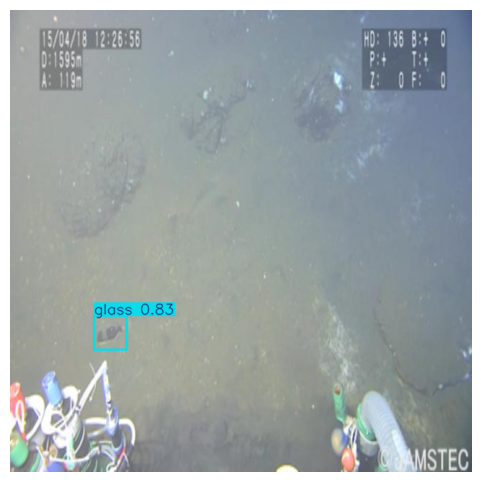

In [11]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob

def visualize_results(img_path, model):
    img = Image.open(img_path)
    results = model(img)

    # Extract the first result and get the plotted image
    result_img = results[0].plot()

    # Convert image to NumPy array if it's not already
    result_img = np.array(result_img)

    # Convert BGR (OpenCV default) to RGB for correct display in matplotlib
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    # Show image with bounding boxes
    plt.figure(figsize=(6,6))
    plt.imshow(result_img)
    plt.axis("off")
    plt.show()
    plt.pause(0.001)  # Force display update
    plt.close()  # Prevent duplicate figures

# Load test images
test_images = glob.glob("/content/drive/MyDrive/yolo_new/test/images/*.jpg")

# Run visualization
if test_images:
    visualize_results(test_images[250], model)
else:
    print("No test images found.")

In [12]:
import glob
model_files = glob.glob("/content/runs/detect/*/weights/best.pt")
print("Available model files:", model_files)

Available model files: ['/content/runs/detect/train/weights/best.pt']


In [13]:
import glob

# List all training runs
train_folders = glob.glob("/content/runs/detect/*/")

print("Available training runs:")
for folder in train_folders:
    print(folder)

Available training runs:
/content/runs/detect/train/
/content/runs/detect/train2/


In [14]:
import glob

# Check logs inside different training folders
for folder in train_folders:
    log_files = glob.glob(folder + "/*.csv")
    if log_files:
        print(f"✅ Logs found in: {folder}")
        print(log_files)
    else:
        print(f"❌ No CSV logs found in: {folder}")

✅ Logs found in: /content/runs/detect/train/
['/content/runs/detect/train/results.csv']
❌ No CSV logs found in: /content/runs/detect/train2/


Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


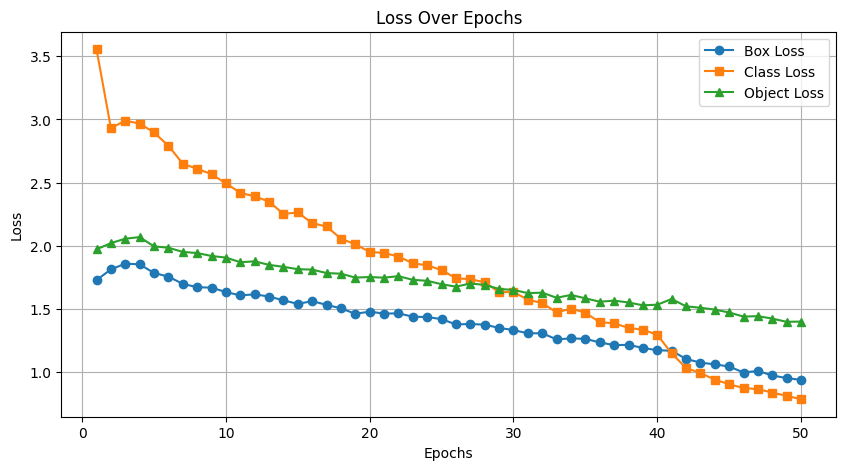

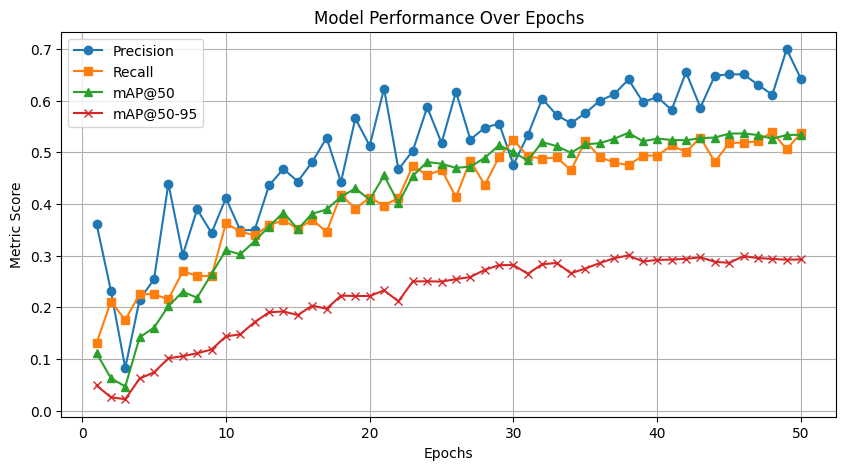

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Load the CSV file
csv_path = "/content/runs/detect/train/results.csv"
df = pd.read_csv(csv_path)

# Print column names to check available metrics
print("Available columns:", df.columns)

# ✅ Force Matplotlib to display the figures
def plot_loss():
    plt.figure(figsize=(10, 5))
    plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss", marker='o')
    plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss", marker='s')
    plt.plot(df["epoch"], df["train/dfl_loss"], label="Object Loss", marker='^')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show(block=True)  # ✅ Forces Jupyter to display

def plot_accuracy():
    plt.figure(figsize=(10, 5))
    plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision", marker='o')
    plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall", marker='s')
    plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50", marker='^')
    plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95", marker='x')

    plt.xlabel("Epochs")
    plt.ylabel("Metric Score")
    plt.title("Model Performance Over Epochs")
    plt.legend()
    plt.grid()
    plt.show(block=True)  # ✅ Forces Jupyter to display

# ✅ Call the functions
plot_loss()
plot_accuracy()

In [16]:
import shutil

# Define source and destination paths
source_path = "/content/runs/detect/train/weights/best.pt"
destination_path = "/content/drive/My Drive/saved_models/best_yolov9.pt"

# Ensure the destination folder exists
shutil.os.makedirs("/content/drive/My Drive/saved_models", exist_ok=True)

# Copy the trained model to Google Drive
shutil.copy(source_path, destination_path)

print(f"✅ Model successfully saved to: {destination_path}")

✅ Model successfully saved to: /content/drive/My Drive/saved_models/best_yolov9.pt


In [17]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Evaluate on the test dataset
metrics = model.val(data="/content/drive/MyDrive/yolo_new/data.yaml", split="test")

# Extract performance metrics
print("mAP50:", metrics.box.map50)      # Mean Average Precision at IoU 0.5
print("mAP50-95:", metrics.box.map)     # Mean Average Precision at IoU 0.5:0.95
print("Precision:", metrics.box.p.mean())   # Mean Precision across all classes
print("Recall:", metrics.box.r.mean())  # Mean Recall across all classes
print("F1 Score:", metrics.box.f1.mean())  # Mean F1 Score



Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs


val: Scanning /content/drive/MyDrive/yolo_new/test/labels.cache... 272 images, 5 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:17<00:00,  1.01s/it]


                   all        272        381      0.668      0.529      0.574      0.297
                 cloth         46         70      0.633      0.514      0.564      0.321
                 glass         59         59      0.844      0.814      0.853      0.472
                 metal         45         56      0.526      0.482      0.502      0.221
               plastic         82        136       0.61      0.566      0.574      0.288
                  wood         48         60      0.726      0.267      0.376      0.184
Speed: 1.0ms preprocess, 12.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
mAP50: 0.5737784936127124
mAP50-95: 0.2973032707775048
Precision: 0.6679229251607864
Recall: 0.5285662061434744
F1 Score: 0.5753727197528122
